<center><h1> The ising Model with transverse magnetic field </h1></center>

## Introduction
In this tutorial has been implemented a use case from the Condensed matter physics, focusing on a well known model from this field,the one dimensional **Ising Model**.

The Ising model is one of the most famous exactly solvable models, i.e. those models that are integrable, it represents the simplest theoretical description of ferromagnetism. 

<figure><rb>
  <img src="ferromagnetism.gif"width="400" height="321" alt=" Figure 2.
Random spin flipping in one-dimensional system.">
  <figcaption> <br><center><b>Figure 1.</b>
Ferromagnetism example   <a href='http://mriquestions.com/what-is-ferromagnetism.html'>[link]<a> .</center></br></figcaption>
</br></figure>


Ferromagnetism is a physical phenomenon that arises when a collection of atomic spins align such that their associated magnetic moments all point in the same direction, yielding a net magnetic moment which is macroscopic in size

This model was invented by Wilhelm Lenz in 1920: it is named after Ernst Ising, a student of Wilhelm Lenz who chose the model as the subject of his doctoral dissertation in 1925.

Consider $N = 7$ atoms one dimensional open chain in the presence of a $x$-directed magnetic field of strength $h$. Suppose that all atoms are identical spin-$1/2$ systems. It follows that either


$$  
\begin{equation}
  S_{i}^{x/z} =
    \begin{cases}
      +1 & \text{(spin up)}\\
      -1 & \text{(spin down)}\\
    \end{cases}       
\end{equation}
$$

where $S_{i}^{x/z}$ is (twice) the $x/z$-component of the $i$th atomic spin.
For each configuration we get a different energy of the system.

$$ \\ $$

<figure><rb>
  <img src="ising.png" alt="Figure 2.
Random spin flipping in one-dimensional system.">
  <figcaption> <br><center><b>Figure 2.</b>
Random spin flipping in one-dimensional system.</center></br></figcaption>
</br></figure>

The Hamiltonian of the system, that represents its energy, is written:


$$
H_{ising} = -\sum_{<i ,j>}^{N} J \, S_{i}^{z}S_{j}^{z} - h \sum_{i=1}^{N} S_{i}^{x} \tag{1.0}
$$

Here, $<i j>$ refers to a sum over nearest neighbour pairs of atoms. Furthermore, $J$ is called the exchange energy. The $(1.0)$ equation is the essence of the Ising model.
The physics of the Ising model is as follows. The first term on the right-hand side of the $(1.0)$ equation shows that the overall energy is lowered when neighbouring atomic spins are aligned.

In this tutorial we show one of a possible usage of a quantum computer: how to calculate the energy of the system and how to get the ground state, making use of the qiskit package and a specific quantum algorithm, and then we compare the results obtained diagonalizing the hamiltonian matrix using a "classical" method.


**Referements**

- [Ising Model - Enciclopedia of Mathematics](https://encyclopediaofmath.org/wiki/Ising_mode)
- [Ising Model Notes - utexas.edu](http://farside.ph.utexas.edu/teaching/329/lectures/node110.html)
- [Ising Model simulator](https://mattbierbaum.github.io/ising.js/)

## Numerical Calculation

The $S^{\alpha},\, \alpha = [x,y,z]$ are the *pauli matrices*:
$$ S^{x,y,z} = \sigma^{x,y,z} = 
\begin{pmatrix} 
0 & 1\\
1 & 0
\end{pmatrix} 
= 
\begin{pmatrix} 
0 & -i\\
i & 0
\end{pmatrix} 
=
\begin{pmatrix} 
1 & 0\\
0 & -1
\end{pmatrix} 
$$


The pauli matrices as the spin operators satisfy the usual commutation relation:

$$ [ S_{i}^{\alpha}, S_{j}^{\beta}] = 2i\delta_{ij}\epsilon^{\alpha \beta \gamma} S_{i}^{\gamma} \\ \alpha \beta \gamma = x,y,z $$

and also the following anticommutation relation:
$$ \{  S_{i}^{\alpha}, S_{j}^{\beta} \} = 0 $$
and
$$ (S_{i}^{\alpha})^{2} =  \mathbb{1} $$

**Referements**

-[Springer - Quantum Ising Phases and Transitions in Trasverse Ising Models](https://www.springer.com/gp/book/9783642330384)


## Hybrid Algorithms : Variational Quantum Eigensolver 

$$ \\ $$

<figure><rb>
  <img src="vqe.png" alt="Figure 2.
Random spin flipping in one-dimensional system.">
  <figcaption> <br><center><b>Figure 3.</b>
VQE workflow representation.</center></br></figcaption>
</br></figure>



The **Variational Quantum Eigensolver**, or **VQE** for short, is a quantum computing algorithm that is well suited for solving certain classes of problems using quantum computers available in the near term. 

VQE may be used for problems involving modeling nature, including chemistry, as Dr. *Richard Feynmann* challenged the world to do. VQE is also great at finding optimal combinations of things, for example finding the shortest route for visiting a list of cities. This is known as the travelling sales man problem, and mathematicians call these sorts of challenges combinatorial optimzization problems.

VQE, in details, is a hybrid algorithm that uses a variational technique and interleaves quantum and classical computations in order to find the minimum eigenvalue of the Hamiltonian $𝐻$ of a given system.

An instance of VQE requires defining two algorithmic sub-components: a trial state (ansatz) from Aqua’s 
`variatonal_forms`, and one of the classical optimizers. 

The ansatz is varied, via its set of parameters, by the optimizer, such that it works towards a state, as determined by the parameters applied to the variational form, that will result in the minimum expectation value being measured of the input operator (Hamiltonian).

**Referements**

- [VQE - qiskit documentation](https://qiskit.org/documentation/stubs/qiskit.aqua.algorithms.VQE.html)

- [Operators - qiskit documentation](https://qiskit.org/documentation/tutorials/circuits_advanced/2_operators_overview.html)

- [Operators - tutorial](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits_advanced/2_operators_overview.ipynb)

- [ansatz - last release](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html#qiskit.circuit.library.TwoLocal)

In [1]:
import numpy as np
from numpy import linalg
#import matplotlib
import matplotlib.pyplot as plt

from qiskit import *
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, Aer, execute

from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.components.optimizers import COBYLA, SPSA

from qiskit.circuit import ParameterVector
from qiskit.circuit.library import NLocal

from qiskit.aqua.algorithms import VQE
from qiskit.aqua.operators import WeightedPauliOperator

from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.extensions import RXGate, CnotGate, XGate, IGate

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg' # Makes the images look nice


from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.providers.models import BackendProperties
from qiskit.providers.aer import noise

from qiskit.tools.monitor import job_monitor

my_api_token = '359d9c9c5b6a1efc59e40042c9f4b1fe4be830a26ebe42118a1651daac0a7bd8739a64548c525c2fbef276c0c1f2bfe187d908988a0ae6e9de3692be45fb6b8e'
provider = IBMQ.enable_account(my_api_token)
IBMQ.providers()
print('Initialization done')

Initialization done


### Quantum devices Setting

In [2]:
nShots = 8192

J = -1


# Magnetic Field 
h = np.linspace(0,4,10) # add 10 configuration points

# Optimization Algorithm
optimizer = COBYLA(maxiter=50, tol=0.001, rhobeg=1.0)

# Hardware selection
HW = 'ibmqx2'

# Backend selection
BK = "noiseless" # "noisy", "hardware"

if BK == "noiseless":
    
    backend = Aer.get_backend("qasm_simulator")
    quantum_instance = QuantumInstance(backend,
                                       shots=nShots)
    
if BK == "noisy":
    
    
    device = IBMQ.get_provider().get_backend(HW)
    
    # From the real devices get its topology and its properties
    
    coupling_map = device.configuration().coupling_map # Topology
    
    prop = device.properties() # Properties
    
    noise_model = noise.device.basic_device_noise_model(prop)
    
    basis_gates = noise_model.basis_gates

    backend = Aer.get_backend('qasm_simulator')
    
    quantum_instance = QuantumInstance(backend,
                                       shots=nShots,
                                       noise_model=noise_model,
                                       coupling_map=coupling_map)
    
if BK == "hardware":
    
    device = IBMQ.get_provider().get_backend(HW)
    prop = device.properties()
    
    quantum_instance = QuantumInstance(device,
                                       shots=nShots)

### Quantum ground state calculation

In [3]:
energy = []

# Hamiltonian creation
for k in range(len(h)):

    op = []
    op.append((J,    Pauli(label = 'ZZ')))
    op.append((h[k], Pauli(label = 'IX')))
    op.append((h[k], Pauli(label = 'XI')))

    Operator = WeightedPauliOperator(op, z2_symmetries=None, atol=1e-12)
    
    #Ansatz creation
    
    params = ParameterVector('theta',4)
    # Rotation block
    rot = QuantumCircuit(2)
    rot.ry(params[0],0)
    rot.rz(params[1],0)
    
    rot.ry(params[2],1)
    rot.rz(params[3],1)
    #-----------------------------
    # Entanglement block
    entant = QuantumCircuit(2)
    entant.cx(0,1)
    #-----------------------------
    var_form = NLocal(2, rot, entant, reps=1, 
              insert_barriers=True
              )

    vqe = VQE(Operator, var_form, optimizer)
    
    energy.append(vqe.run(quantum_instance)['energy'])

gates =  OrderedDict([('ry', 4), ('rz', 4), ('barrier', 2), ('cx', 1)])
depth =  5


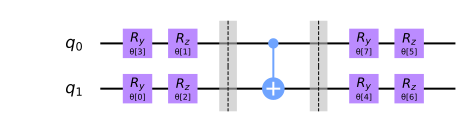

In [4]:
# Ansatz Visualization

print('gates = ', var_form.count_ops())
print('depth = ', var_form.depth())
var_form.draw('mpl')

### Classical energy levels calculation

In [5]:
from qiskit.aqua.operators import WeightedPauliOperator
from qiskit.quantum_info.operators import Operator, Pauli

X = Operator(Pauli(label='X'))
Z = Operator(Pauli(label='Z'))
Y = Operator(Pauli(label='Y'))
Id = Operator(IGate())

E_l = []
P_l = []
energy_levels = []

# Build the Hamiltonian Matrix as sum of tensor products 
for k in range(len(h)):
    H = (J)*Z.tensor(Z)+\
        (h[k])*Id.tensor(X)+\
        (h[k])*X.tensor(Id)

    # Diagonalize the Hamiltonian getting the Eigenvalues and Eigenvectors
    E_l,P_l = linalg.eig(H.data)

    Es = np.sort(E_l)

    energy_levels.append(np.real(Es))

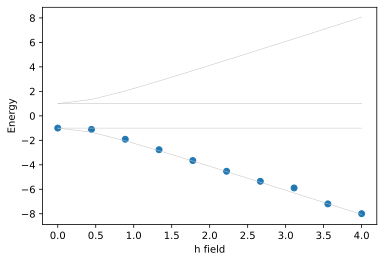

In [6]:
## Plot results

fig, ax = plt.subplots()
#plt.xticks(b)

ax.scatter(h, energy, marker='o')
ax.plot(h, energy_levels, color="#c2c2c2", linewidth=0.5)

ax.set(xlabel='h field', ylabel='Energy', title='')

#ax.grid()
plt.show()